In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import transforms
from torchvision.datasets import ImageFolder
from PIL import Image

In [5]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print(torch.__version__, DEVICE)

1.8.0 cuda


In [6]:
import torchvision
torchvision.__version__

'0.9.0'

In [7]:
BATCH_SIZE = 32
EPOCHS = 10

from glob import glob  
train_dataset = glob('./data/mnist_png/training/*/*.png')  
test_dataset = glob('./data/mnist_png/testing/*/*.png')  

In [ ]:
#Image.open('./data/mnist_png/training/*/*.png')

In [73]:
tr_dataset = ImageFolder(root = './data/mnist_png/training', 
                         transform = transforms.ToTensor() )
ts_dataset = ImageFolder(root = './data/mnist_png/testing', 
                         transform = transforms.ToTensor() )

In [74]:
train_loader = torch.utils.data.DataLoader(dataset = tr_dataset, 
                                           batch_size = BATCH_SIZE, 
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = ts_dataset, 
                                          batch_size = BATCH_SIZE, 
                                          shuffle = False)

In [75]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 3, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


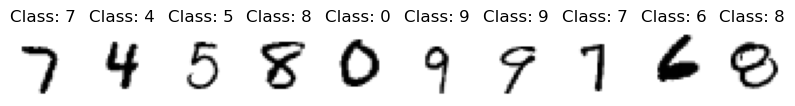

In [80]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,0,:,:].numpy().reshape(28,28), cmap='gray_r')
    plt.title('Class: ' + str(y_train[i].item()))